# Competition Survey

Analyse important factors from past results of FS Electric competitions

# Libraries

In [1]:
import pandas as pd

import os

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg'] # makes everything svg by default
%matplotlib inline

from sklearn import preprocessing

# Importing Results
PDFs from FS Website

In [2]:
rel = "data/"
files = os.listdir("./data")

In [3]:
def read_file(file):
    if( ".csv" == file[-4:] ):
        df = pd.read_csv(rel + file)
        return df

In [4]:
raw_formula_student = pd.DataFrame()
for file in files:
    if( ".csv" == file[-4:] ):
        raw_formula_student = pd.concat(
            [raw_formula_student, read_file(file)]
        )

# Data Cleanup

In [5]:
def cleanup(df):
    df = df.copy()
    df.dropna(inplace=True)
    df.iloc[:, 2:12] = (
        df.iloc[:, 2:12]
        .apply(lambda x: x.str.replace(',', '.'))
        .values.astype(float)
        )
    df[["Car", "Overall Placing"]] = df[["Car", "Overall Placing"]].values.astype('int32')
    df = df.set_index([
        "Competition",
        "City/University"
    ])
    return df

formula_student = raw_formula_student.pipe(cleanup)
formula_student

Car   Cost    BPP  Design    ACC  SkidPad  \
Competition City/University                                              
FSG19       München TU        31  93.00  49.14   120.0  66.79    75.00   
            Karlsruhe KIT     19  95.00  73.00   133.0  73.95    50.70   
            Freiberg TU       85  88.00  52.58   100.0  46.19    37.19   
            Aachen RWTH       99  92.00  74.00   115.0  58.39    12.41   
            Eindhoven TU      40  98.00  62.18    95.0  37.69    52.09   
...                          ...    ...    ...     ...    ...      ...   
FSG21       Chemnitz TU       36  77.90  57.86    55.0   0.00     0.00   
            Berlin TU        113  79.80  52.61    55.0   0.00     0.00   
            Ilmenau TU        71  61.75  45.43    60.0   0.00     0.00   
            Lausanne EPFL    127  41.80  36.41    75.0   0.00    28.71   
            Diepholz UAS      18  42.75  45.14    25.0   0.00     0.00   

                              AutoX    Endu  Effic  Penalties  Overall Scores  \
Competition City/University                                                     
FSG19       München TU       100.00  325.00  96.81        0.0          925.74   
            Karlsruhe KIT     49.71  186.00  98.13        0.0          759.50   
            Freiberg TU       62.84  229.71  95.19        0.0          711.70   
            Aachen RWTH       48.89  205.64  93.74        0.0          700.07   
            Eindhoven TU      34.52  175.01  89.24       65.0          578.73   
...                             ...     ...    ...        ...             ...   
FSG21       Chemnitz TU        0.00    0.00   0.00       30.0          160.76   
            Berlin TU          0.00    0.00   0.00       35.0          152.41   
            Ilmenau TU         0.00    0.00   0.00       18.0          149.18   
            Lausanne EPFL      4.50    0.00   0.00       60.0          126.42   
            Diepholz UAS       0.00    0.00   0.00       64.0           48.89   

                             Overall Placing  
Competition City/University                   
FSG19       München TU                     1  
            Karlsruhe KIT                  2  
            Freiberg TU                    3  
            Aachen RWTH                    4  
            Eindhoven TU                   5  
...                                      ...  
FSG21       Chemnitz TU                   34  
            Berlin TU                     35  
            Ilmenau TU                    36  
            Lausanne EPFL                 37  
            Diepholz UAS                  38  

[152 rows x 12 columns]

# Analysis

# Overview

Car Overall Scores             
            count           mean   min    max
Competition                                  
FSG17          35          350.4   0.0  918.1
FSG18          40          345.9   0.0  883.8
FSG19          39          313.6   0.0  925.7
FSG21          38          401.3  48.9  937.7

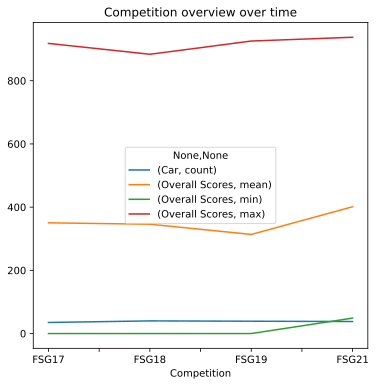

In [6]:
overview = (
    formula_student[["Car", "Overall Scores"]]
    .groupby(
        ["Competition"]
    )
    .agg({
        'Car' : ["count"],
        'Overall Scores' : ["mean", "min", "max"]
    })
    .round(1)
)

overview.plot(title="Competition overview over time", figsize=(6, 6))


overview

# Importance of Evaluation Components
Using **correlation**, the components are sorted in descending order of their importance

In [7]:
(
    formula_student
    .iloc[:, 1:11]
    .corr()
    .rename(columns={"Overall Scores":"Correlation"})
    [["Correlation"]]
    .sort_values("Correlation", ascending=False)
    .iloc[1:, :] # remove the obvious overall scores = 1.00
)

,Correlation
Endu,0.868175
Effic,0.811912
AutoX,0.777112
ACC,0.754784
Design,0.722782
SkidPad,0.708315
Cost,0.538074
BPP,0.458588
Penalties,-0.410896


# Teams with best cost scores

We can learn how these teams managed to get such good positions

In [8]:
(
    formula_student[["Cost", "Overall Placing"]]
    .sort_values("Cost", ascending = False)
    .head(10)
    .sort_values("Overall Placing")
)

Cost  Overall Placing
Competition City/University                           
FSG21       Stuttgart U          99.0                1
FSG18       Karlsruhe KIT       100.0                4
FSG19       Eindhoven TU         98.0                5
FSG17       Karlsruhe KIT       100.0                6
FSG19       Stuttgart U         100.0                7
FSG17       Barcelona UPC       100.0                7
FSG21       Sankt Augustin UAS  100.0                8
FSG18       Delft TU            100.0                9
            Hamburg TU           99.0               17
FSG19       Schweinfurt UAS      99.0               24